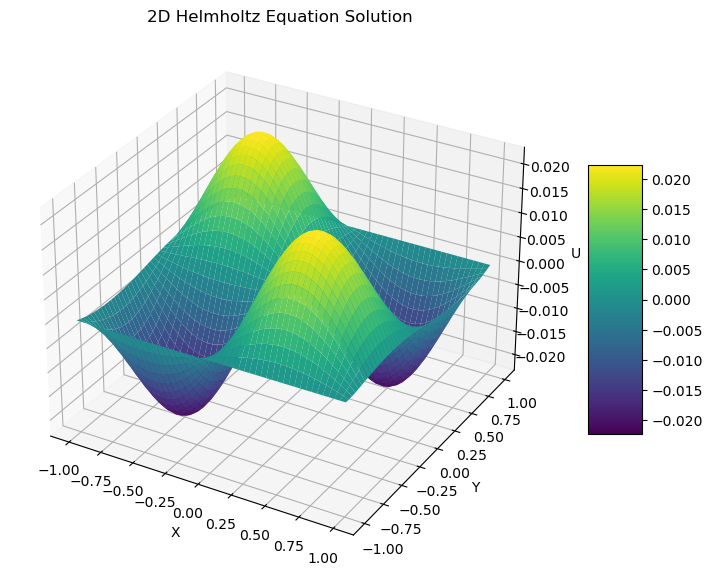

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Grid setup
N = 50  # Number of points in each direction
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
h = x[1] - x[0]  # Grid spacing, assuming uniform spacing

# Constants
k = 5  # k value in the Helmholtz equation

# Source term
F = np.sin(np.pi * X) * np.sin(np.pi * Y)

# Construct the A matrix for the 2D problem
# Using 5-point stencil: (-4 in the center, 1 on each side)
A = np.zeros((N**2, N**2))
for i in range(N**2):
    A[i, i] = -4 - k**2 * h**2
    if i - 1 >= 0:
        A[i, i - 1] = 1.0
    if i + 1 < N**2:
        A[i, i + 1] = 1.0
    if i - N >= 0:
        A[i, i - N] = 1.0
    if i + N < N**2:
        A[i, i + N] = 1.0

# Apply boundary conditions by setting rows in A to 0 where boundary conditions apply
# and setting the diagonal to 1 (to keep the matrix invertible)
for i in range(N):
    for j in [0, N-1]:
        idx = i + j*N
        A[idx, :] = 0
        A[idx, idx] = 1

# Flatten F for solving
F_flat = F.flatten()
# Boundary conditions are already accounted for by zeroing in F
U_flat = np.linalg.solve(A, F_flat*h**2)

# Reshape the solution back to 2D
U = U_flat.reshape((N, N))

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap='viridis')
ax.set_title('2D Helmholtz Equation Solution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
